In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
import datetime as dt
import pandas as pd

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
temps_june = []
temps_june = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==6)

In [6]:
#  3. Convert the June temperatures to a list.
temps_june = list(temps_june)

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(temps_june,columns=['date','temps'])
df.set_index(df['date'], inplace=True)
df.sort_index()

,date,temps
date,,
2010-06-01,2010-06-01,78.0
2010-06-01,2010-06-01,73.0
2010-06-01,2010-06-01,77.0
2010-06-01,2010-06-01,69.0
2010-06-01,2010-06-01,76.0
...,...,...
2017-06-30,2017-06-30,76.0
2017-06-30,2017-06-30,75.0
2017-06-30,2017-06-30,75.0


In [14]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
print('June Temperatures on O‘ahu')
df.describe()

June Temperatures on O‘ahu


,temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) == 12)

In [10]:
# 7. Convert the December temperatures to a list.
dec_temps = list(dec_temps)

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(dec_temps, columns=['date','temps'])
df_dec.set_index(df_dec['date'],inplace=True)
df_dec.sort_index()

,date,temps
date,,
2010-12-01,2010-12-01,76.0
2010-12-01,2010-12-01,73.0
2010-12-01,2010-12-01,72.0
2010-12-01,2010-12-01,78.0
2010-12-01,2010-12-01,72.0
...,...,...
2016-12-31,2016-12-31,67.0
2016-12-31,2016-12-31,72.0
2016-12-31,2016-12-31,66.0


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
print('December Temperature on O‘ahu')
df_dec.describe()

December Temperature on O‘ahu


,temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [20]:
# Further Analysis 
june_data = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(extract('month', Measurement.date)==6).all()
dec_data = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(extract('month', Measurement.date)==12).all()

june_df = pd.DataFrame(june_data,columns=['date','temps F','precipitation'])
dec_df = pd.DataFrame(dec_data,columns=['date','temps F','precipitation'])

In [25]:
dec_df['precipitation'].describe()

count    1405.000000
mean        0.216819
std         0.541399
min         0.000000
25%         0.000000
50%         0.030000
75%         0.150000
max         6.420000
Name: precipitation, dtype: float64

In [26]:
june_df['precipitation'].describe()

count    1574.000000
mean        0.136360
std         0.335731
min         0.000000
25%         0.000000
50%         0.020000
75%         0.120000
max         4.430000
Name: precipitation, dtype: float64

In [50]:
data = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).all()
data_df = pd.DataFrame(data,columns=['date','temps F','precipitation'])
data_df['date'] = pd.to_datetime(data_df['date'])
data_df.set_index(data_df['date'],inplace=True)
data_df['month'] = data_df['date'].dt.month
data_df['year'] = data_df['date'].dt.year

In [73]:
data_grouped = data_df.groupby('month').sum()
data_grouped.drop(['year'],axis=1)

,temps F,precipitation
month,,
1,118690.0,210.56
2,111802.0,201.24
3,118610.0,319.82
4,123948.0,240.27
5,127689.0,236.58
6,127405.0,214.63
7,130177.0,263.47
8,123941.0,218.82
9,112724.0,226.50


Text(0.5, 1.0, 'Average Daily Rainfall per Month (2010-2017)')

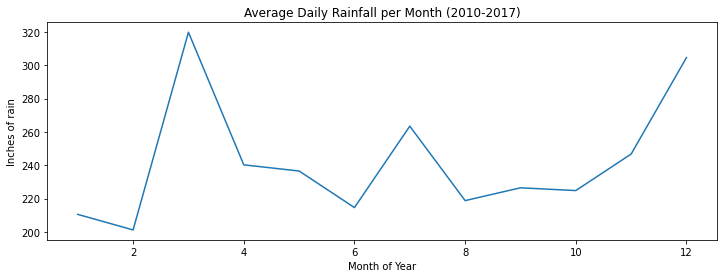

In [74]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(12, 4))
data_grouped["precipitation"].plot()
axs.set_ylabel("Inches of rain")
axs.set_xlabel("Month of Year")
axs.set_title('Average Daily Rainfall per Month (2010-2017)')

Text(0.5, 1.0, 'Average Temp per Month (2010-2017)')

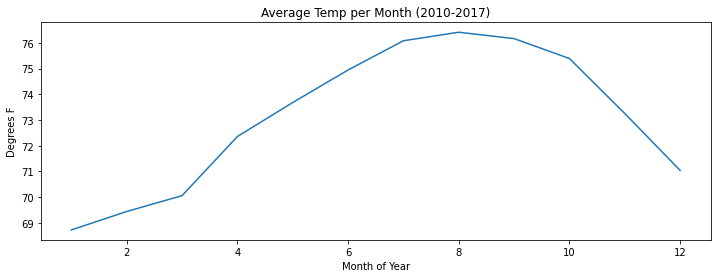

In [72]:
fig, axs = plt.subplots(figsize=(12, 4))
data_grouped["temps F"].plot()
axs.set_ylabel("Degrees F")
axs.set_xlabel("Month of Year")
axs.set_title('Average Temp per Month (2010-2017)')